In [1]:
%cd ..

/home/tianshu/prediction


In [2]:
import json
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.pyplot import Line2D
from tqdm.notebook import tqdm

from forecast import Dataset, Results

In [3]:
ds = Dataset("data.npz", if_data="if.npz", offset=1000. * 1000.)
results = Results(
    ds, base_dir="results", manifest="results/manifest.json",
    baseline_key="Lr8")

  0%|          | 0/33 [00:00<?, ?it/s]

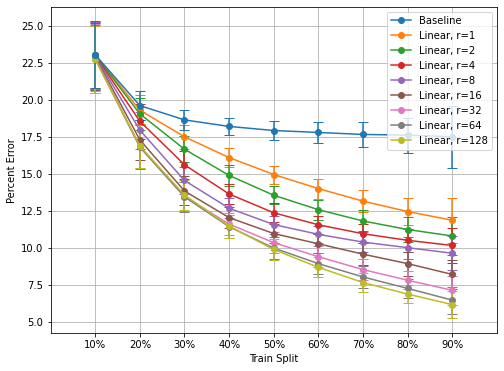

In [7]:
# Ablation: Linear Dimension

def _ablation_linear_r():
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    results.plots(
        ["Lr{}".format(r) for r in [1, 2, 4, 8, 16, 32, 64, 128]],
        ax=ax, boxplot=False)

_ablation_linear_r()

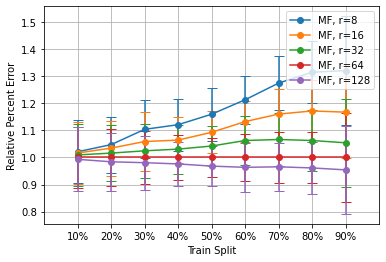

In [12]:
# Ablation: Embedding Dimension

def _ablation_embedding_r():
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    results.plots(
        ["Er{}".format(r) for r in [8, 16, 32, 64, 128]],
        ax=ax, boxplot=False, normalize="Er64", baseline=False)
    ax.set_ylabel("Relative Percent Error")

_ablation_embedding_r()

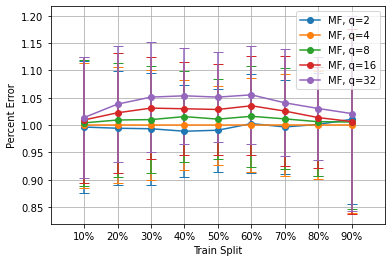

In [14]:
# Ablation: Embedding Learnable Input Features

def _ablation_embedding_q():
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    results.plots(
        ["Eq{}".format(r) for r in [2, 4, 8, 16, 32]],
        ax=ax, boxplot=False, baseline=False, normalize="Eq4")

_ablation_embedding_q()

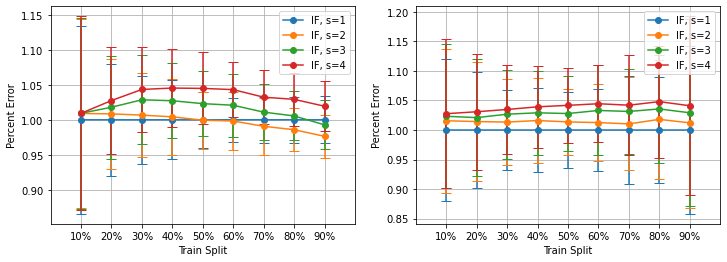

In [16]:
# Ablation: Interference Types

def _ablation_interference_s():
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    results.plots(
        ["Is{}".format(s) for s in [1, 2, 3, 4]],
        ax=axs[0], baseline=False, key="interference", boxplot=False,
        normalize="Is1")
    results.plots(
        ["Is{}".format(s) for s in [1, 2, 3, 4]],
        ax=axs[1], baseline=False, key="error", boxplot=False,
        normalize="Is1")

_ablation_interference_s()

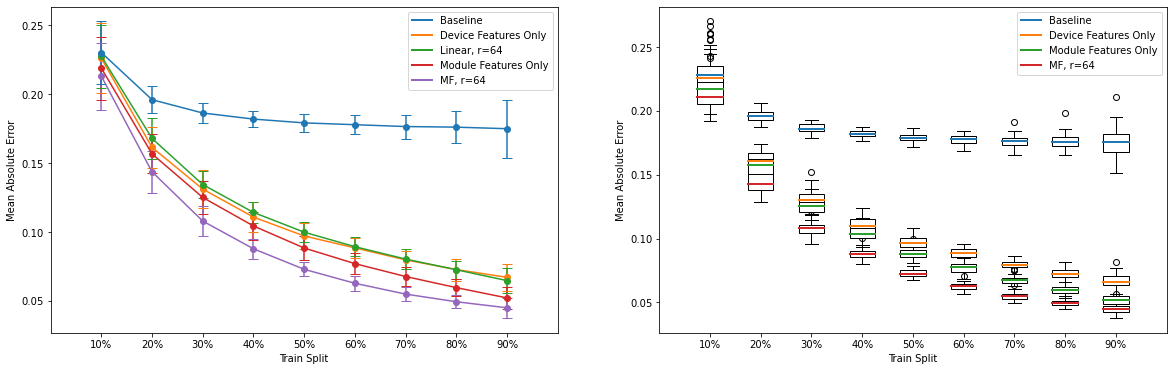

In [9]:
# Ablation: Input Features

def _ablation_features():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    results.plots(
        ["device_only", "Lr64", "module_only", "Er64"],
        ax=axs[0], baseline=True, key="error", boxplot=False)
    results.plots(
        ["device_only", "module_only", "Er64"],
        ax=axs[1], baseline=True, key="error", boxplot=True)

_ablation_features()

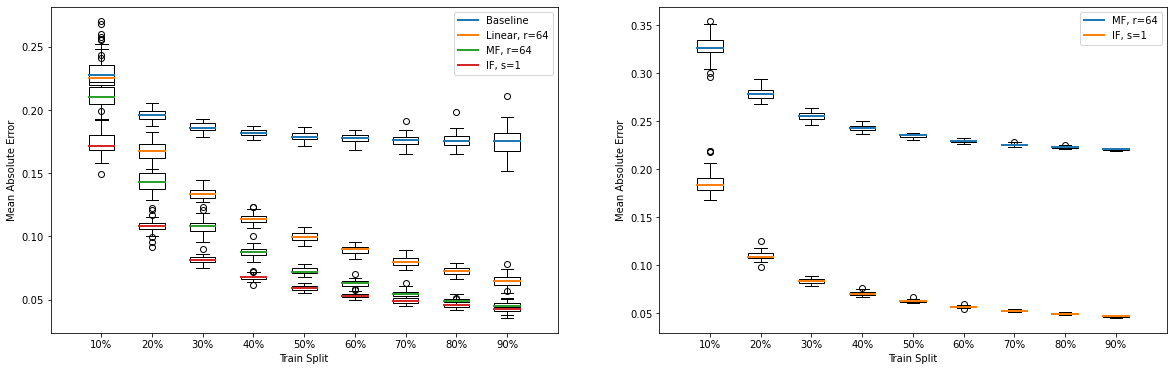

In [10]:
# Comparisons

def _compare():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    results.plots(
        ["Lr64", "Er64", "Is1"], ax=axs[0], baseline=True,
        boxplot=True, key="error")
    results.plots(
        ["Er64", "Is1"], ax=axs[1], baseline=False,
        boxplot=True, key="interference")

_compare()

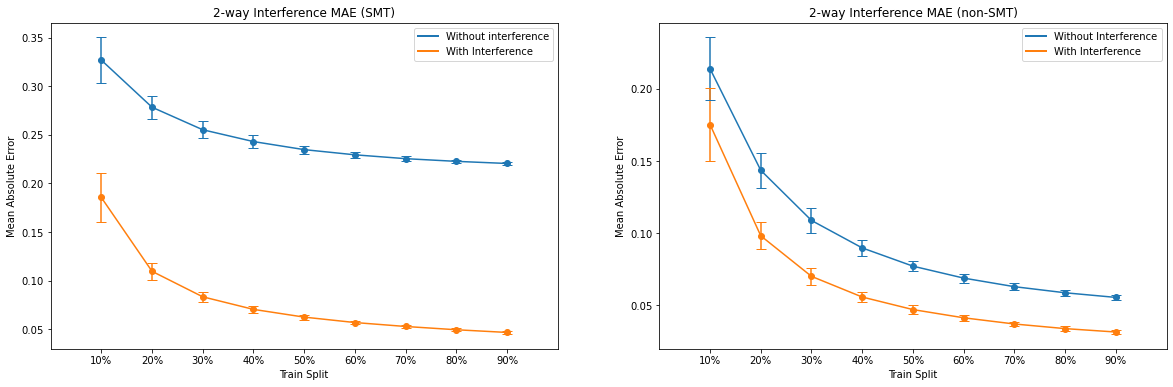

In [16]:
# 2-way, different datasets

def _if_2way():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    results.plots(
        ["Er64", "Is1"], ax=axs[0], baseline=False,
        boxplot=False, key="interference",
        labels={"Er64": "Without interference", "Is1": "With Interference"})
    results.plots(
        ["e.if.mc", "if.mc"], ax=axs[1], baseline=False,
        boxplot=False, key="interference",
        labels={
            "e.if.mc": "Without Interference",
            "if.mc": "With Interference"})
    axs[0].set_title("2-way Interference MAE (SMT)")
    axs[1].set_title("2-way Interference MAE (non-SMT)")

_if_2way()

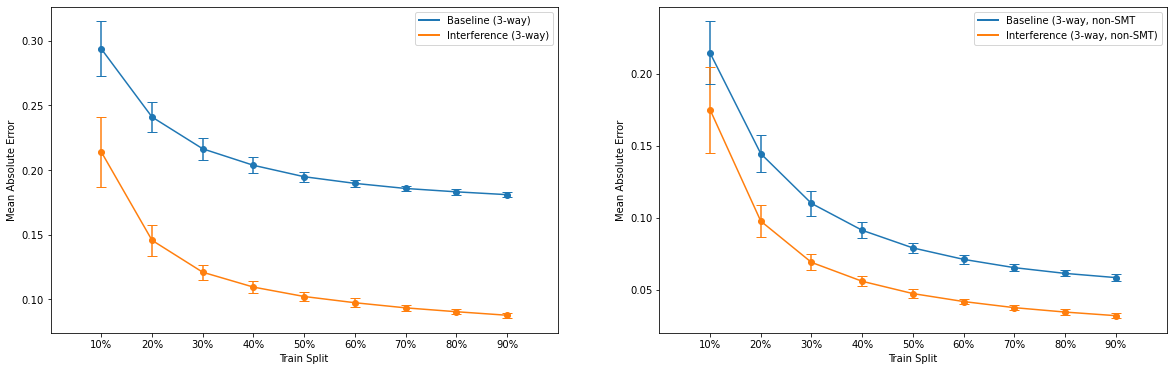

In [12]:
# 3-way

def _if_3way():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    results.plots(
        ["e.if3", "if3"], ax=axs[0], baseline=False,
        boxplot=False, key="interference")
    results.plots(
        ["e.if3.mc", "if3.mc"], ax=axs[1], baseline=False,
        boxplot=False, key="interference")

_if_3way()